In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("data.xlsx" , converters= {"year":str , "sem" : str , "section" : str})


In [4]:
df

,ข้อคำถาม,5,5(%),4,4(%),3,3(%),2,2(%),1,...,subject,section,นักศึกษาที่จดทะเบียน,นักศึกษาที่ประเมิน,url,year,sem,n,class,situation
0,สอนอย่างเป็นระบบ,4,66.67,1,16.67,0,0.00,1,16.67,0,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
1,สอนให้คิด วิเคราะห์ วิจารณ์,4,66.67,0,0.00,1,16.67,1,16.67,0,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
2,กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าส...,2,33.33,1,16.67,1,16.67,1,16.67,1,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
3,เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบก...,3,50.00,2,33.33,0,0.00,0,0.00,1,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
4,มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท...,3,50.00,2,33.33,1,16.67,0,0.00,0,...,FGL497,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการ...,15,51.72,9,31.03,3,10.34,2,6.90,0,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal
320,โสตทัศนูปกรณ์ช่วยสอนในห้องเรียน เช่น ไมโครโฟน ...,14,48.28,8,27.59,5,17.24,1,3.45,1,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal
321,สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุ...,13,44.83,11,37.93,4,13.79,0,0.00,1,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal
322,จำนวนอุปกรณ์ในการเรียนการสอนเพียงพอ และเหมาะสม...,15,51.72,6,20.69,5,17.24,0,0.00,3,...,NYE553,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal


# N Distribution

<AxesSubplot:xlabel='n', ylabel='Density'>

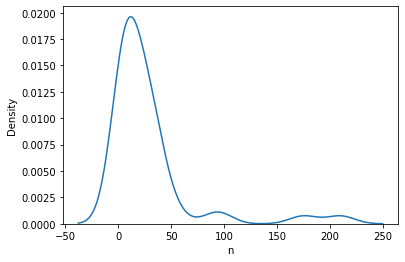

In [5]:
sns.kdeplot(df["n"].sort_values())

Text(0.5, 1.0, 'N')

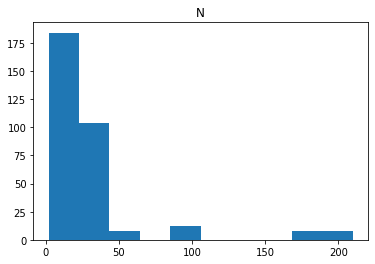

In [6]:

plt.hist(df["n"])
plt.title("N")

In [7]:
pvt = df.pivot_table(index=["year","sem","subject","section","situation"] , values="x_bar" , aggfunc="mean")
pvt.reset_index(inplace=True)


## Distribution of X-Bar each year

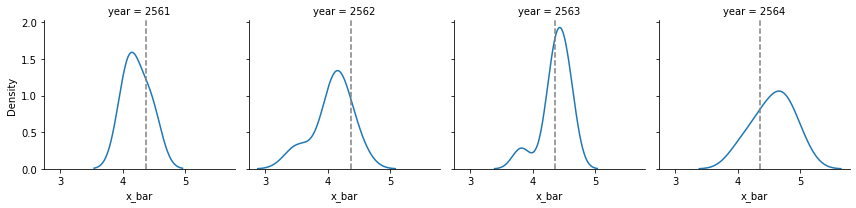

In [8]:
g = sns.FacetGrid(pvt , col ="year")
g.map(sns.kdeplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

In [9]:
detail = df.groupby("year").x_bar.describe()
detail.reset_index(inplace= True)
detail.to_excel("year.xlsx" )

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


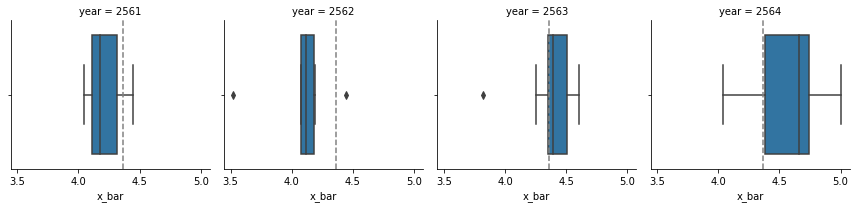

In [10]:
g = sns.FacetGrid(pvt , col = "year")
g.map(sns.boxplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


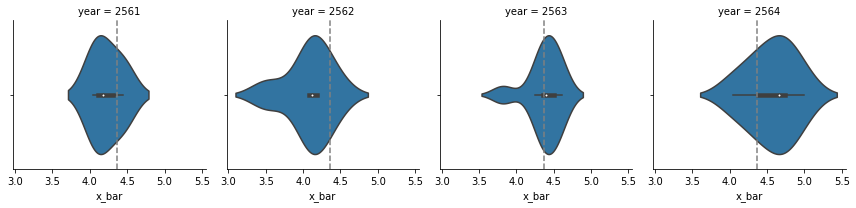

In [11]:
g = sns.FacetGrid(pvt , col = "year")
g.map(sns.violinplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

## Distribution of X-Bar each situation

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


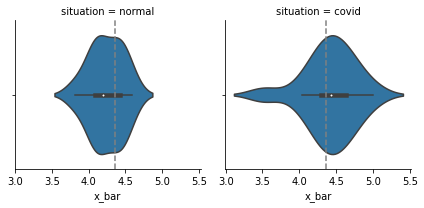

In [12]:
g = sns.FacetGrid(pvt , col = "situation" )
g.map(sns.violinplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

## Ploting IQR each year

In [13]:
Q_75 = df.pivot_table(index='year',values="x_bar", aggfunc=lambda x: np.quantile(x, 0.75))
Q_25 = df.pivot_table(index='year',values="x_bar", aggfunc=lambda x: np.quantile(x, 0.25))

Q_25.reset_index(inplace= True)
Q_25.rename(columns={"x_bar":"Q25"} , inplace= True)
Q_75.reset_index(inplace= True)
Q_75.rename(columns={"x_bar":"Q75"} , inplace= True)

IQR = pd.merge(Q_25 , Q_75 , on= "year")
IQR["IQR"] = IQR["Q75"] - IQR["Q25"]

IQR

,year,Q25,Q75,IQR
0,2561,4.0000,4.5700,0.5700
1,2562,3.9075,4.5000,0.5925
2,2563,4.2475,4.5925,0.3450
3,2564,4.4050,4.7900,0.3850


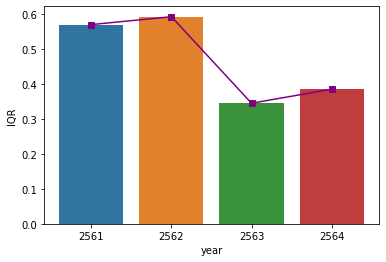

In [14]:
sns.barplot(data = IQR , x="year" , y="IQR")
plt.plot(IQR["year"], IQR["IQR"] , color = "purple" , marker = "s")

## Skewed - Right Distribution

* From this chart have 2 skewed right distribution , 2561 and 2562

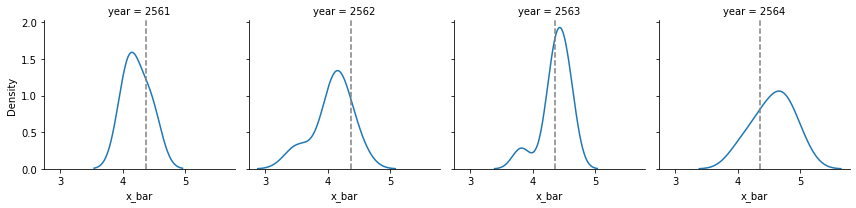

In [15]:
g = sns.FacetGrid(pvt , col ="year")
g.map(sns.kdeplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

In [16]:
one = df[df["year"] == "2561"]
two = df[df["year"] == "2562"]

In [17]:
one.pivot_table(index= [ "sem", "subject" , "section"] , values= ["x_bar"])

x_bar
sem subject section          
2   NVI781  231863   4.450500
    RMW014  556574   4.173333
    YRY790  231863   4.042500

In [18]:
pvt = two.pivot_table(index= [ "sem", "subject" , "section"] , values= ["x_bar"])
pvt.reset_index(inplace= True)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, '2561')

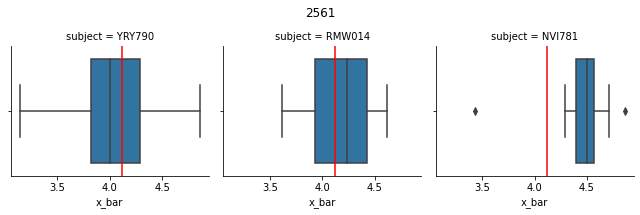

In [19]:
g = sns.FacetGrid(one , col= "subject" )
g.map(sns.boxplot , "x_bar")
g.refline(x=pvt["x_bar"].median(), color= "r" , linestyle="-")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("2561")

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, '2562')

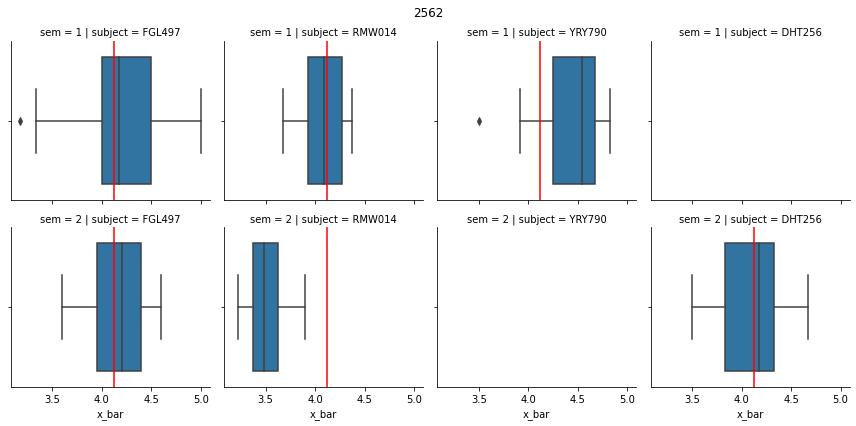

In [20]:
g = sns.FacetGrid(two , col= "subject" ,row="sem")
g.map(sns.boxplot , "x_bar")
g.refline(x=pvt["x_bar"].median() , color= "r" , linestyle="-" )

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("2562")

## Topic

In [21]:
df.groupby("topic").x_bar.describe()

,count,mean,std,min,25%,50%,75%,max
topic,,,,,,,,
ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,208.0,4.293173,0.417676,2.88,4.0000,4.355,4.6025,5.00
ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน,72.0,4.461250,0.345184,3.38,4.2875,4.525,4.7100,5.00
ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้,44.0,4.137727,0.366002,3.17,4.0000,4.245,4.3800,4.62


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


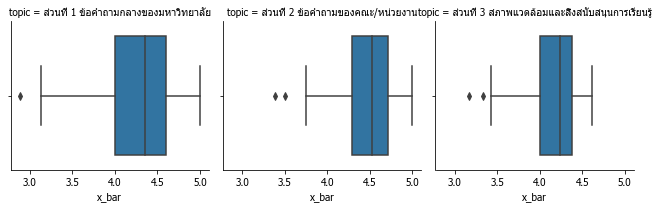

In [22]:
plt.rcParams.update({"font.family":"tahoma"})
g = sns.FacetGrid(df, col = "topic")
g.map(sns.boxplot , "x_bar")

In [23]:
df["นักศึกษาที่ประเมิน(n)"] = ""

In [24]:
for i in range(len(df["นักศึกษาที่ประเมิน"]))   : 
    df["นักศึกษาที่ประเมิน(n)"][i] = df["นักศึกษาที่ประเมิน"][i].split()[0]
df["นักศึกษาที่ประเมิน(n)"] = pd.to_numeric(df["นักศึกษาที่ประเมิน(n)"] )

C:\Users\User\AppData\Local\Temp\ipykernel_4300\3739083856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["นักศึกษาที่ประเมิน(n)"][i] = df["นักศึกษาที่ประเมิน"][i].split()[0]


In [57]:
pvt = df.pivot_table(index=["year","sem","subject","section","n" ,"นักศึกษาที่จดทะเบียน"] , values= "x_bar")

In [58]:
pvt

x_bar
year sem subject section n   นักศึกษาที่จดทะเบียน          
2561 2   NVI781  231863  7   44                    4.450500
         RMW014  556574  30  326                   4.173333
         YRY790  231863  7   44                    4.042500
2562 1   FGL497  231863  6   43                    4.191500
         RMW014  556574  94  501                   4.075833
         YRY790  231863  12  50                    4.441500
     2   DHT256  270981  6   12                    4.091500
         FGL497  231863  5   50                    4.150000
         RMW014  556574  210 511                   3.520000
2563 1   DRI970  231863  29  43                    4.417000
                 728025  25  47                    4.582500
         NYE553  231863  29  43                    4.351500
         YRY790  728025  9   44                    3.817500
     2   AZW892  231863  5   43                    4.375000
         FGL497  231863  6   44                    4.605000
                 696574  4   41                    4.250000
                 728025  10  45                    4.350000
         NVI781  231863  8   46                    4.517500
         RMW014  556574  175 560                   4.480000
2564 1   DRI970  231863  53  127                   4.425000
         NVI781  231863  35  64                    4.661250
         NYE553  231863  15  46                    4.776250
         XCM602  231863  2   14                    5.000000
         YRY790  231863  34  64                    4.037500
     2   AZW892  231863  33  46                    4.706250
         FGL497  231863  41  66                    4.338750

In [59]:
pvt.reset_index(inplace= True)
pvt["n_appear"] = 0

In [60]:
ind = 0
for i in pvt["subject"] :
    pvt["n_appear"][ind] = pvt["subject"].value_counts()[i]
    ind += 1

C:\Users\User\AppData\Local\Temp\ipykernel_4300\376705675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvt["n_appear"][ind] = pvt["subject"].value_counts()[i]
C:\Users\User\AppData\Local\Temp\ipykernel_4300\376705675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvt["n_appear"][ind] = pvt["subject"].value_counts()[i]
C:\Users\User\AppData\Local\Temp\ipykernel_4300\376705675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [61]:
pvt

,year,sem,subject,section,n,นักศึกษาที่จดทะเบียน,x_bar,n_appear
0,2561,2,NVI781,231863,7,44,4.450500,3
1,2561,2,RMW014,556574,30,326,4.173333,4
2,2561,2,YRY790,231863,7,44,4.042500,4
3,2562,1,FGL497,231863,6,43,4.191500,6
4,2562,1,RMW014,556574,94,501,4.075833,4
5,2562,1,YRY790,231863,12,50,4.441500,4
6,2562,2,DHT256,270981,6,12,4.091500,1
7,2562,2,FGL497,231863,5,50,4.150000,6
8,2562,2,RMW014,556574,210,511,3.520000,4
9,2563,1,DRI970,231863,29,43,4.417000,3


Text(0, 0.5, 'จำนวนครั้งที่ถูกบันทึก')

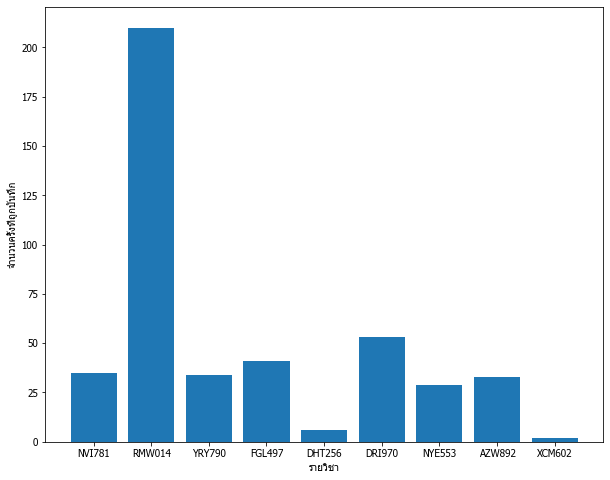

In [29]:
plt.rcParams.update({"font.family":"tahoma"})
plt.figure(figsize=(10, 8))

plt.bar(pvt["subject"] , height= pvt["n"])
plt.xlabel("รายวิชา")
plt.ylabel("จำนวนครั้งที่ถูกบันทึก")

In [30]:
pvt2 = pvt.pivot_table(index = ["subject"] , values= ["n","นักศึกษาที่จดทะเบียน"] , aggfunc= "sum") 
pvt2.reset_index(inplace= True)

In [31]:
pvt2

,subject,n,นักศึกษาที่จดทะเบียน
0,AZW892,38,89
1,DHT256,6,12
2,DRI970,107,217
3,FGL497,72,289
4,NVI781,50,154
5,NYE553,44,89
6,RMW014,509,1898
7,XCM602,2,14
8,YRY790,62,202


Text(0, 0.5, 'จำนวนนักศึกษาที่ประเมิน')

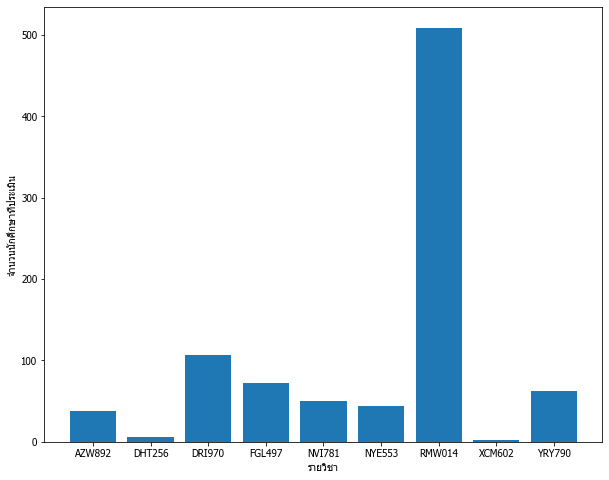

In [32]:
plt.rcParams.update({"font.family":"tahoma"})
plt.figure(figsize=(10, 8))

plt.bar(pvt2["subject"] , height= pvt2["n"])
plt.xlabel("รายวิชา")
plt.ylabel("จำนวนนักศึกษาที่ประเมิน")

In [64]:
pvt.reset_index(inplace=True)

In [65]:
pvt

,index,year,sem,subject,section,n,นักศึกษาที่จดทะเบียน,x_bar,n_appear
0,0,2561,2,NVI781,231863,7,44,4.450500,3
1,1,2561,2,RMW014,556574,30,326,4.173333,4
2,2,2561,2,YRY790,231863,7,44,4.042500,4
3,3,2562,1,FGL497,231863,6,43,4.191500,6
4,4,2562,1,RMW014,556574,94,501,4.075833,4
5,5,2562,1,YRY790,231863,12,50,4.441500,4
6,6,2562,2,DHT256,270981,6,12,4.091500,1
7,7,2562,2,FGL497,231863,5,50,4.150000,6
8,8,2562,2,RMW014,556574,210,511,3.520000,4
9,9,2563,1,DRI970,231863,29,43,4.417000,3


In [68]:
pvt["ratio"] = (pvt["n"] / pvt["นักศึกษาที่จดทะเบียน"]) *100

In [71]:
pvt

,index,year,sem,subject,section,n,นักศึกษาที่จดทะเบียน,x_bar,n_appear,ratio
0,0,2561,2,NVI781,231863,7,44,4.450500,3,15.909091
1,1,2561,2,RMW014,556574,30,326,4.173333,4,9.202454
2,2,2561,2,YRY790,231863,7,44,4.042500,4,15.909091
3,3,2562,1,FGL497,231863,6,43,4.191500,6,13.953488
4,4,2562,1,RMW014,556574,94,501,4.075833,4,18.762475
5,5,2562,1,YRY790,231863,12,50,4.441500,4,24.000000
6,6,2562,2,DHT256,270981,6,12,4.091500,1,50.000000
7,7,2562,2,FGL497,231863,5,50,4.150000,6,10.000000
8,8,2562,2,RMW014,556574,210,511,3.520000,4,41.095890
9,9,2563,1,DRI970,231863,29,43,4.417000,3,67.441860


Text(0, 0.5, 'จำนวนนักศึกษาที่จดทะเบียน')

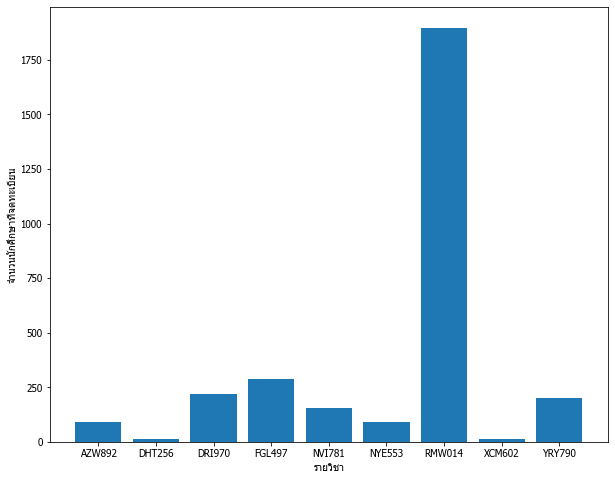

In [35]:
plt.rcParams.update({"font.family":"tahoma"})
plt.figure(figsize=(10, 8))

plt.bar(pvt2["subject"] , height= pvt2["นักศึกษาที่จดทะเบียน"])
plt.xlabel("รายวิชา")
plt.ylabel("จำนวนนักศึกษาที่จดทะเบียน")

# ปัญหาไหนไม่ได้รับการแก้ไข

In [36]:
df["x_bar"].mean()

4.309413580246914

In [37]:
df.loc[df["x_bar"] < 4 ,"x_bar"]

2      3.33
16     3.33
17     3.17
26     3.80
53     3.60
54     3.80
56     3.77
57     3.47
58     3.34
59     3.90
60     3.50
61     3.22
62     3.38
63     3.58
73     3.93
74     3.68
75     3.95
77     3.79
79     3.91
100    3.71
101    3.71
102    3.14
104    3.57
105    3.86
117    3.43
118    3.86
146    3.92
161    3.92
162    3.50
167    3.97
168    3.88
169    3.64
170    3.97
190    3.62
191    3.70
195    3.72
209    3.83
215    3.83
216    3.83
217    3.50
218    3.50
219    3.67
222    3.43
261    3.80
265    3.38
266    3.13
267    3.75
268    3.75
269    3.38
270    3.50
271    2.88
272    3.75
276    3.88
278    3.38
279    3.50
286    3.92
Name: x_bar, dtype: float64

In [48]:
df.pivot_table(index=["year","subject" ,"topic"] , values= "x_bar" , aggfunc="mean")

x_bar
year subject topic                                                    
2561 NVI781  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.287500
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                4.571250
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  4.535000
     RMW014  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.036250
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  4.447500
     YRY790  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             3.785000
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                4.392500
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  3.857500
2562 DHT256  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.146250
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                4.270000
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  3.625000
     FGL497  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.106250
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                4.541250
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  3.750000
     RMW014  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             3.756250
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  4.242500
     YRY790  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.511250
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                4.602500
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  3.980000
2563 AZW892  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.375000
     DRI970  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.404375
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                4.670000
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  4.350000
     FGL497  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.401667
     NVI781  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.517500
     NYE553  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.292500
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                4.508750
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  4.155000
     RMW014  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.480000
     YRY790  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             3.507500
             ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน                3.925000
             ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้  4.222500
2564 AZW892  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.706250
     DRI970  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.425000
     FGL497  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.338750
     NVI781  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.661250
     NYE553  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.776250
     XCM602  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             5.000000
     YRY790  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย             4.037500

# Relation x_bar / n  dim = situation

In [38]:
df

,ข้อคำถาม,5,5(%),4,4(%),3,3(%),2,2(%),1,...,section,นักศึกษาที่จดทะเบียน,นักศึกษาที่ประเมิน,url,year,sem,n,class,situation,นักศึกษาที่ประเมิน(n)
0,สอนอย่างเป็นระบบ,4,66.67,1,16.67,0,0.00,1,16.67,0,...,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal,6
1,สอนให้คิด วิเคราะห์ วิจารณ์,4,66.67,0,0.00,1,16.67,1,16.67,0,...,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal,6
2,กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าส...,2,33.33,1,16.67,1,16.67,1,16.67,1,...,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal,6
3,เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบก...,3,50.00,2,33.33,0,0.00,0,0.00,1,...,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal,6
4,มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท...,3,50.00,2,33.33,1,16.67,0,0.00,0,...,231863,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,2562,1,6,1/2562|FGL497|231863,normal,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการ...,15,51.72,9,31.03,3,10.34,2,6.90,0,...,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal,29
320,โสตทัศนูปกรณ์ช่วยสอนในห้องเรียน เช่น ไมโครโฟน ...,14,48.28,8,27.59,5,17.24,1,3.45,1,...,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal,29
321,สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุ...,13,44.83,11,37.93,4,13.79,0,0.00,1,...,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal,29
322,จำนวนอุปกรณ์ในการเรียนการสอนเพียงพอ และเหมาะสม...,15,51.72,6,20.69,5,17.24,0,0.00,3,...,231863,43,29 (67.44%),https://sgulyano.github.io/eval/96905621.html,2563,1,29,1/2563|NYE553|231863,normal,29


In [39]:
pvt = df.pivot_table(index=["subject","section","situation"] , values= "x_bar" ,aggfunc= "mean")
pvt.reset_index(inplace= True)

In [40]:
pvt2 = df.pivot_table(index=["subject","section","situation","n"] ,values="x_bar" )
pvt2.reset_index(inplace= True)

In [41]:
pvt2.drop(columns="x_bar" , inplace= True)

In [42]:
pvt3 = pd.merge(pvt,pvt2 , on=["subject","section" ,"situation"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


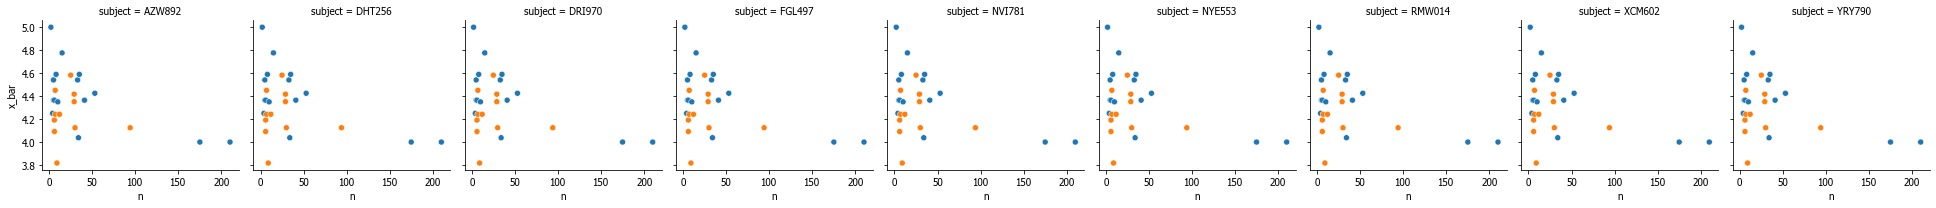

In [43]:
g = sns.FacetGrid(pvt3 , col="subject")
plt.legend()
g.map(sns.scatterplot ,data = pvt3 , x="n" , y="x_bar" , hue="situation")

In [4]:
df.degree.unique()

array(['ปริญญาตรี โครงการพิเศษ', 'ปริญญาตรี โครงการปกติ',
       'ปริญญาโท โครงการพิเศษ'], dtype=object)

In [6]:
b_norm = df[df['degree'] == 'ปริญญาตรี โครงการปกติ']

In [12]:
df[df['degree'] == 'ปริญญาตรี โครงการพิเศษ'].pivot_table(index=['topic','ข้อคำถาม'] , values='x_bar')

x_bar
topic                                           ข้อคำถาม                                                    
ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสน...  3.631250
                                                ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง       4.146250
                                                ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด ว...  4.322308
                                                ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และ...  4.720000
                                                ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข...  4.511538
                                                ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำกั...  4.560769
                                                ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้น...  4.500000
                                                ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปรึ...  4.453077
                                                ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และ...  4.486923
                                                ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างปร...  4.256154
                                                มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท้...  4.291250
                                                สอนอย่างเป็นระบบ                                    4.325000
                                                สอนให้คิด วิเคราะห์ วิจารณ์                         4.140000
                                                เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบกา...  4.230000
                                                แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้                 4.200000
                                                ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี                       4.291250
ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน               ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป็...  4.311250
                                                ผู้สอนมาสอนสม่ำเสมอ                                 4.680000
                                                ผู้สอนมีการเตรียมการสอนมาอย่างดี                    4.435000
                                                ผู้สอนสอนเนื้อหาครบถ้วน และสอดคล้องตามเค้าโครงก...  4.450000
                                                ผู้สอนเข้าสอนและเลิกสอนตรงเวลา                      4.780000
                                                ผู้สอนแจ้งวัตถุประสงค์และเนื้อหารายวิชาตามเค้าโ...  4.450000
                                                ผู้สอนแจ้งเกณฑ์และวิธีประเมินผลล่วงหน้าชัดเจน       4.640000
                                                ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการเ...  4.135000
ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ จำนวนอุปกรณ์ในการเรียนการสอนเพียงพอ และเหมาะสมต...  4.100000
                                                สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุณ...  4.016250
                                                เจ้าหน้าที่อำนวยความสะดวกในการให้บริการในการเรี...  4.345000
                                                โสตทัศนูปกรณ์ช่วยสอนในห้องเรียน เช่น ไมโครโฟน เ...  4.138750